In [1]:
using Plots, LaTeXStrings
using Plots.PlotMeasures
empty!(ARGS)
#push!(ARGS, "G:/Hamburg/b20.0_mu1.0/lDGAConfig.toml")
push!(ARGS, "G:/Hamburg/b20.0_mu1.0/lDGAConfig.toml")# "G:/tmp_ED_data/U2.0_b20.0_mu1.0.toml")
include(joinpath(@__DIR__,"../examples/example00_lDGA.jl"))

using LaTeXStrings

  Activating project at `G:\Codes\LadderDGA.jl`


[ Info: Reading Inputs...
[ Info: m channel: |∑χ(q=0,ω≠0)| = 0.000297843848 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 0.000209554839 ≟ 0
╭──── λ-correction (type: LadderDGA.LambdaCorrection.mCorrection),... ─────────╮
│  λm = 0.10852026, λd = 0.00000000, μ = 0.96591298, n = 0.99736161            │
│  PP_1   =  0.24999903,  PP_2   =  0.24999903,  Δ = 0.0000%                   │
│  Epot_1 =  0.10272905,  Epot_2 =  0.12356106,  Δ = 9.2059%                   │
│  Ekin_1 = -0.22279173,  Ekin_2 = -0.20903607,  Δ = 3.1854%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯
╭──── λ-correction (type: LadderDGA.LambdaCorrection.dmCorrection),... ────────╮
│  λm = 0.10635214, λd = 12.69884259, μ = 0.97102826, n = 0.99746854           │
│  PP_1   =  0.24999903,  PP_2   =  0.24999903,  Δ = 0.0000%                   │
│  Epot_1 =  0.08464865,  Epot_2 =  0.08464865,  Δ = 0.0

In [2]:
res_m_ntc  = λm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=:plain)
res_m      = λm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=:full)
res_dm_ntc = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=:plain)
res_dm     = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=:full)

╭──── λ-correction (type: LadderDGA.LambdaCorrection.dmCorrection),... ────────╮
│  λm = 0.10749338, λd = 3.76333511, μ = 0.96495795, n = 0.99734165            │
│  PP_1   =  0.24999903,  PP_2   =  0.24999903,  Δ = 0.0000%                   │
│  Epot_1 =  0.10685015,  Epot_2 =  0.10685015,  Δ = 0.0000%                   │
│  Ekin_1 = -0.23077724,  Ekin_2 = -0.20903607,  Δ = 4.9433%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


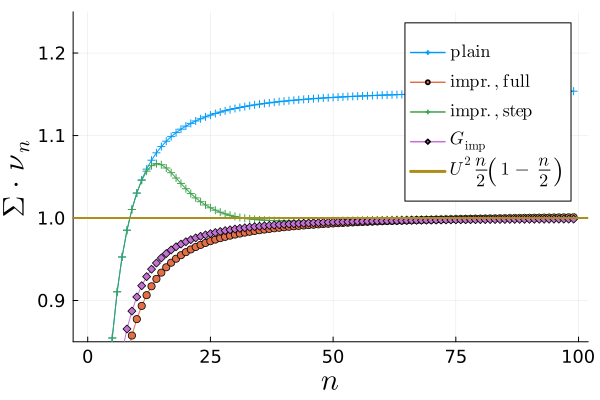

In [3]:
mP = lDGAhelper.mP
kG = lDGAhelper.kG
U = mP.U
nden = mP.n
beta = mP.β
lim_se = U^2 * (nden/2) * (1 - nden/2)
xr = collect(axes(se_ntc,2))
iν_arr = LadderDGA.iν_array(beta, xr)
gimp = lDGAhelper.gImp[1,xr]
#se_ntc
λm_test = res_dm_ntc.λm
λd_test = res_dm_ntc.λd
Σλ_ntc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :plain);
Σλ_tc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :full);
tc_factor_full = LadderDGA.tail_factor(mP.U, mP.β, mP.n, lDGAhelper.Σ_loc, iν_arr; mode=:full)
tc_factor_exp_1 = LadderDGA.tail_factor(mP.U, mP.β, mP.n, lDGAhelper.Σ_loc, iν_arr; mode=:exp_step, δ=0.001)
tc_factor_exp_2 = LadderDGA.tail_factor(mP.U, mP.β, mP.n, lDGAhelper.Σ_loc, iν_arr; mode=:exp_step, δ=0.05)
tc_factor_exp_3 = LadderDGA.tail_factor(mP.U, mP.β, mP.n, lDGAhelper.Σ_loc, iν_arr; mode=:exp_step, δ=0.1)
tc_term_full  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_full)
tc_term_exp_1  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_exp_1)
tc_term_exp_2  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_exp_2)
tc_term_exp_3  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_exp_3)

plot(xr, real(Σλ_ntc[1,:].parent .* iν_arr), ylims=(0.85,1.25), markershape=:auto, legend=:topright, label = L"\mathrm{plain}", xlabel=L"n", ylabel= L"\Sigma \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
#plot!(xr, real(Σλ_tc[1,:].parent .* iν_arr), markershape=:auto, label = L"\mathrm{improved}")
plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term_full ))[1,:] .* iν_arr), markershape=:auto, label = L"\mathrm{impr., full}")
plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term_exp_1  ))[1,:] .* iν_arr), markershape=:auto, label = L"\mathrm{impr., step}")
plot!(xr, real(gimp .* iν_arr), markershape=:auto, label = L"G_\mathrm{imp}")
hline!([lim_se], linewidth=2, label=L"U^2 \frac{n}{2} \left(1 - \frac{n}{2} \right)")
#

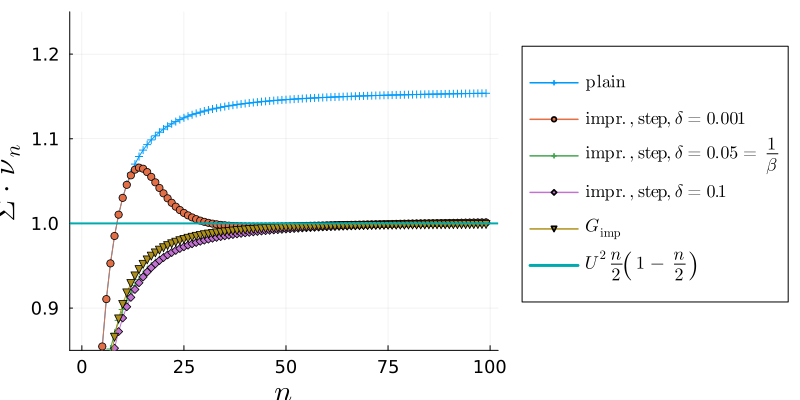

In [4]:
tc_term_exp_1  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_exp_1)
tc_term_exp_2  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_exp_2)
tc_term_exp_3  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_exp_3)

plot(xr, real(Σλ_ntc[1,:].parent .* iν_arr), ylims=(0.85,1.25), size=(800,400), markershape=:auto, legend=:outerright, label = L"\mathrm{plain}", xlabel=L"n", ylabel= L"\Sigma \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
#plot!(xr, real(Σλ_tc[1,:].parent .* iν_arr), markershape=:auto, label = L"\mathrm{improved}")
#plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term_full ))[1,:] .* iν_arr), markershape=:auto, label = L"\mathrm{impr., full}")
plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term_exp_1 ))[1,:] .* iν_arr), markershape=:auto, label = L"\mathrm{impr., step}, \delta=0.001")
plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term_exp_2 ))[1,:] .* iν_arr), markershape=:auto, label = L"\mathrm{impr., step}, \delta=0.05=\frac{1}{\beta}")
plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term_exp_3 ))[1,:] .* iν_arr), markershape=:auto, label = L"\mathrm{impr., step}, \delta=0.1")
plot!(xr, real(gimp .* iν_arr), markershape=:auto, label = L"G_\mathrm{imp}")
hline!([lim_se], linewidth=2, label=L"U^2 \frac{n}{2} \left(1 - \frac{n}{2} \right)")

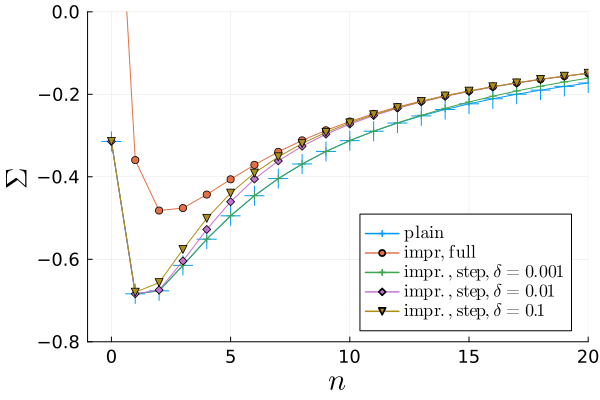

In [5]:
plot(xr, imag(Σλ_ntc[1,:].parent), xlims=(-1,20), ylims=(-0.8,0.0),markershape=:auto, markersize=10, legend=:bottomright,label = L"\mathrm{plain}", xlabel=L"n", ylabel= L"\Sigma",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, imag(Σλ_tc[1,:].parent), markershape=:auto, label = L"\mathrm{impr, full}")
plot!(xr, imag((Σλ_ntc[:,:].parent .+ (tc_term_exp_1 ))[1,:]), markershape=:auto, label = L"\mathrm{impr., step}, δ=0.001")
plot!(xr, imag((Σλ_ntc[:,:].parent .+ (tc_term_exp_2 ))[1,:]), markershape=:auto, label = L"\mathrm{impr., step}, δ=0.01")
plot!(xr, imag((Σλ_ntc[:,:].parent .+ (tc_term_exp_3 ))[1,:]), markershape=:auto, label = L"\mathrm{impr., step}, δ=0.1")
#plot!(xr, imag(gimp ), markershape=:auto, label = L"G_\mathrm{imp}")

In [6]:
xr_dm_01, fr_dm_01 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=1000, λmin=-9.5, λmax=1.0, tc=:plain)
xr_dm_02, fr_dm_02 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=120,  λmin=-9.5, λmax=1.0, tc=:full)
xr_dm_03, fr_dm_03 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=1000, λmin=-9.5, λmax=1.0);

┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed. Falling back to naive summation!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:243
┌ Warning: μ determination failed with: Roots.ConvergenceFailed, fallback failed with Roots.ConvergenceFailed
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:249
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed. Falling back to naive summation!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:243
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed. Falling back to naive summation!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:243
┌ Warning: μ determination failed with: Roots.ConvergenceFailed, fallback failed with Roots.ConvergenceFailed
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:249
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed. Falling back to naive summation!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:24

In [7]:
xr_dm_03, fr_dm_03 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=1000, λmin=-9.5, λmax=1.0);

┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed. Falling back to naive summation!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:243
┌ Warning: μ determination failed with: Roots.ConvergenceFailed, fallback failed with Roots.ConvergenceFailed
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:249
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed. Falling back to naive summation!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:243


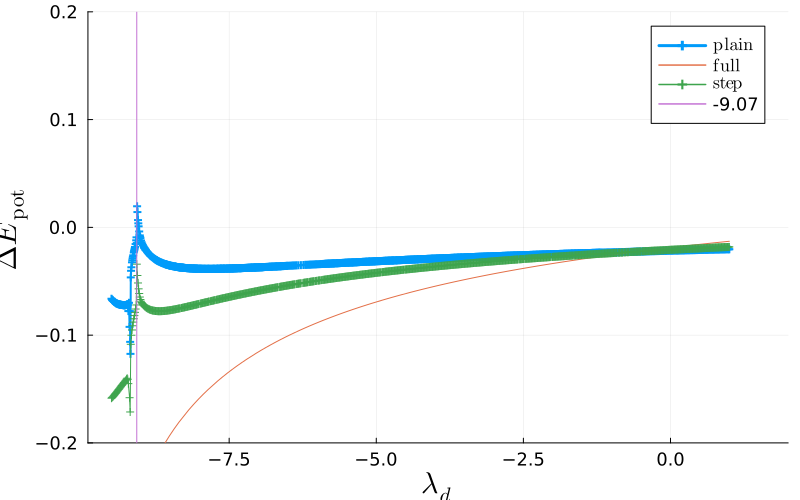

In [22]:
plot(xr_dm_01, fr_dm_01, size=(800,500), linewidth=2, ylims=(-.2,.2), xlims=(-9.9,2), ylabel=L"\Delta E_\mathrm{pot}", xlabel=L"\lambda_d", label=L"\mathrm{plain}",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto)
plot!(xr_dm_02, fr_dm_02, label=L"\mathrm{full}")
plot!(xr_dm_03, fr_dm_03, label=L"\mathrm{step}", markershape=:auto)
vline!([-9.07], label="-9.07")

In [25]:
λd_range = LinRange(-9.5, -5.0, 100)
se_ntc_list = []
se_ftc_list = []
se_etc_list = []
largest_ind_ntc = []
largest_ind_ftc = []
h = lDGAhelper;
for λd_test in λd_range
    rhs_c1,_ = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, h; λd=λd_test)
    ωn2_tail = LadderDGA.ω2_tail(χm)
    λm_test =  LadderDGA.LambdaCorrection.λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail)
    
    se_ntc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :plain);
    se_ftc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :full);
    #se_etc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :exp_step);
    _,ind = findmax(imag(se_ntc[:,0]))
    push!(largest_ind_ntc, ind)
    _,ind = findmax(imag(se_ftc[:,0]))
    push!(largest_ind_ftc, ind)
    push!(se_ntc_list, imag(se_ntc[end-5,0]))
    push!(se_ftc_list, imag(se_ftc[end-5,0]))
    #push!(se_etc_list, imag(se_etc[1,0]))
end

In [24]:
lDGAhelper.kG.kGrid

21-element Vector{Tuple{Float64, Float64}}:
 (0.0, 0.0)
 (0.6283185307179586, 0.0)
 (0.6283185307179586, 0.6283185307179586)
 (1.2566370614359172, 0.0)
 (1.2566370614359172, 0.6283185307179586)
 (1.2566370614359172, 1.2566370614359172)
 (1.8849555921538759, 0.0)
 (1.8849555921538759, 0.6283185307179586)
 (1.8849555921538759, 1.2566370614359172)
 (1.8849555921538759, 1.8849555921538759)
 (2.5132741228718345, 0.0)
 (2.5132741228718345, 0.6283185307179586)
 (2.5132741228718345, 1.2566370614359172)
 (2.5132741228718345, 1.8849555921538759)
 (2.5132741228718345, 2.5132741228718345)
 (3.141592653589793, 0.0)
 (3.141592653589793, 0.6283185307179586)
 (3.141592653589793, 1.2566370614359172)
 (3.141592653589793, 1.8849555921538759)
 (3.141592653589793, 2.5132741228718345)
 (3.141592653589793, 3.141592653589793)

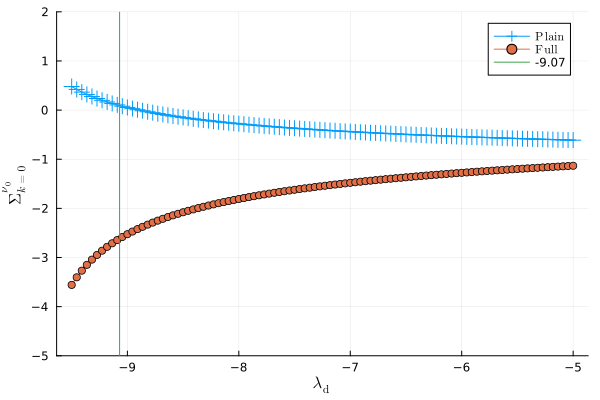

In [26]:
plot(λd_range, se_ntc_list, markershape=:auto, markersize=8, ylims=(-5,2), xlabel=L"\lambda_\mathrm{d}", ylabel=L"\Sigma^{\nu_0}_{k=0}", label=L"\mathrm{Plain}")
plot!(λd_range, se_ftc_list, markershape=:auto, xlabel=L"\lambda_\mathrm{d}", ylabel=L"\Sigma^{\nu_0}_{k=0}", label=L"\mathrm{Full}")
#plot!(λd_range, se_etc_list, markershape=:auto, xlabel=L"\lambda_\mathrm{d}", ylabel=L"\Sigma^{\nu_0}_{k=0}", label=L"\mathrm{Step}")
vline!([-9.07], label="-9.07")

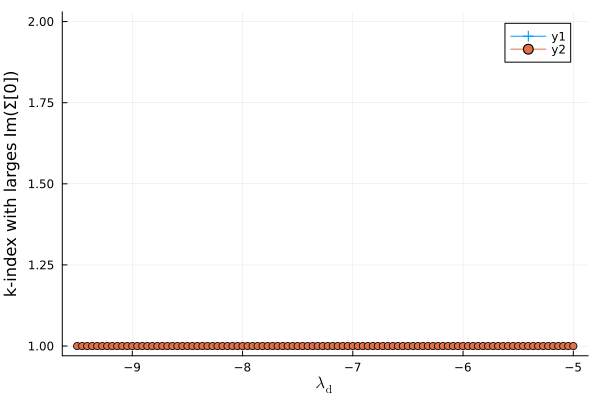

In [11]:
plot(λd_range,largest_ind_ntc, markershape=:auto,  xlabel=L"\lambda_\mathrm{d}", ylabel="k-index with larges Im(Σ[0])")
plot!(λd_range,largest_ind_ftc, markershape=:auto)

In [12]:
λd_range = LinRange(-10.5, 30.0, 100)
se_ntc_list = []
se_ftc_list = []
#se_etc_list = []
h = lDGAhelper;
for λd_test in λd_range
    rhs_c1,_ = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, h; λd=λd_test)
    ωn2_tail = LadderDGA.ω2_tail(χm)
    λm_test =  LadderDGA.LambdaCorrection.λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail)
    
    se_ntc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :plain);
    se_ftc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :full);
    #se_etc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :exp_step);
    push!(se_ntc_list, imag(se_ntc[1,0]))
    push!(se_ftc_list, imag(se_ftc[1,0]))
    #push!(se_etc_list, imag(se_etc[1,0]))
end

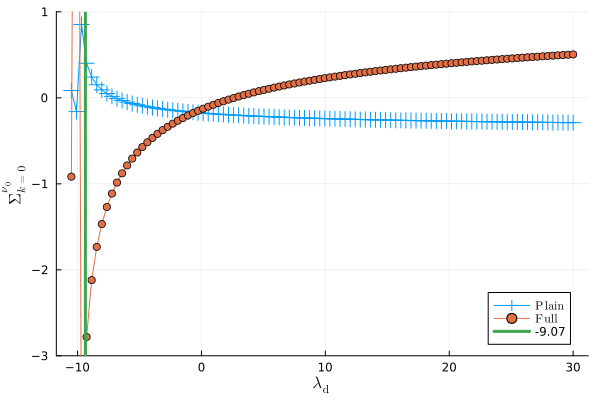

In [13]:
plot(λd_range, se_ntc_list, markershape=:auto, markersize=8, ylims=(-3,1), xlabel=L"\lambda_\mathrm{d}", ylabel=L"\Sigma^{\nu_0}_{k=0}", label=L"\mathrm{Plain}")
plot!(λd_range, se_ftc_list, markershape=:auto, xlabel=L"\lambda_\mathrm{d}", ylabel=L"\Sigma^{\nu_0}_{k=0}", label=L"\mathrm{Full}")
vline!([-9.37], label="-9.07", linewidth=3)

In [14]:
function get_λd_min(χm::χT, γm::γT, χd::χT, γd::γT, λ₀::Array{ComplexF64,3}, h::lDΓAHelper; 
                    λd_max::Float64=0.0, Δλ::Float64 = 1e-1, dΣ0_max::Float64=0.5, dΣ0_threshold::Float64=4.0)::Float64
    nh = ω0_index(χd)
    Nq = length(h.kG.kMult)
    λd_min0 = -minimum(1 ./ view(χd, :, nh)) + Δλ
    ωn2_tail = LadderDGA.ω2_tail(χm)
    Kνωq_pre::Vector{ComplexF64} = Vector{ComplexF64}(undef, Nq)
    Σ_ladder = OffsetArray(Matrix{ComplexF64}(undef, Nq, 1), 1:Nq, 0:0)
    
    λd_max = (λd_max - λd_min0) < 5 ? λd_max + 5 : λd_max
    λd_max_result = λd_max
    
    λd_grid = reverse(LinRange(λd_min0, λd_max, ceil(Int, (λd_max-λd_min0)/Δλ)))
    Σ0_λ_i::Float64 = NaN
    Σ0_λ_im::Float64 = NaN
    dΣ0_λ_last::Float64 = 0.0
    dΣ0_max::Float64 = 0.0
    
    for (i,λd_i) in enumerate(λd_grid)
        rhs_c1,_ = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, h; λd=λd_i)
        λm_i =  LadderDGA.LambdaCorrection.λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail)
        (λm_i != 0) && χ_λ!(χm, λm_i)
        (λd_i != 0) && χ_λ!(χd, λd_i)
        calc_Σ!(Σ_ladder, Kνωq_pre, χm, γm, χd, γd, λ₀, 0.0, h.gLoc_rfft, h.kG, h.mP, h.sP)
        (λm_i != 0) && reset!(χm)
        (λd_i != 0) && reset!(χd)
        Σ0_λ_i, ind = findmax(imag(Σ_ladder[:,0]))
        if i > 1
            dΣ0_λ_last = abs((Σ0_λ_im - Σ0_λ_i)/(λd_grid[i-1] - λd_grid[i]))
            Σ0_λ_im = Σ0_λ_i
        end
        if i > 2 && (Σ0_λ_i > 0 || dΣ0_λ_last > dΣ0_threshold)
            λd_max_result = λd_i
            break
        end
    end
    return λd_max_result
end

get_λd_min (generic function with 1 method)

In [15]:
using OffsetArrays, TimerOutputs
ω0_index = LadderDGA.ω0_index
calc_Σ! = LadderDGA.calc_Σ!
lmax = get_λd_min(χm, γm, χd, γd, λ₀, lDGAhelper)

-7.019112700527244

In [16]:
plot(xr[2:end], tt, markershape=:auto)
plot!(xr[1:end], t1, markershape=:auto, xlims=(-10,-5))
vline!([lmax])

LoadError: UndefVarError: `tt` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [17]:
a = randn(4,5)

4×5 Matrix{Float64}:
  0.93486     0.381302  -0.536438    0.740103   -0.199177
 -0.0923416   0.421475   0.0192972   0.0491905  -0.16722
 -1.66579    -2.00395   -1.87636    -0.351618    0.193036
 -0.165119    0.871286  -0.886615    0.0485523   0.139967

In [18]:
maximum(a)

0.9348598065375543

# Reasoning

 = Enhancement of charge fluctuations make system more metallic -> Sigma(nu_0) gets closer to 0.

 = tail correction term inverts behavior since the difference between magnetic channels now dominates low frequency behavior.

 = Step function and lambda-density cutoff seems to be correct way.